<a href="https://colab.research.google.com/github/harshaljanjani/statsForML/blob/main/FreeCodeCamp_MachineLearningInPython/19_1_2022_Day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tensorflow Introduction**

### 1) Introduction To Tensors
### 2) Core Learning Algorithms - Introduction
### 3) Core Learning Algorithms - Working With Data




In [ ]:
import tensorflow as tf  # import the tensorflow module
print(tf.version)  # make sure the version is 2.x (update - Google Colab only allows 2.x)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.8/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [ ]:
# Creating a 2D tensor
matrix = [[1,2,3,4,5],
          [6,7,8,9,10],
          [11,12,13,14,15],
          [16,17,18,19,20]]

tensor = tf.Variable(matrix, dtype=tf.int32) 
print(tf.rank(tensor))
print(tensor.shape)

tf.Tensor(2, shape=(), dtype=int32)
(4, 5)


(0.0, 6.0, 0.0, 20.0)

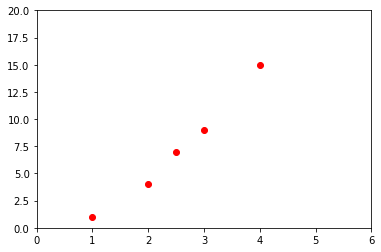

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])

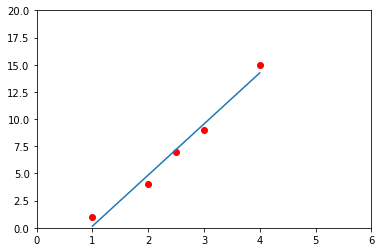

In [ ]:
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

In [ ]:
tensor1 = tf.ones([1,2,3])  # tf.ones() creates a shape [1,2,3] tensor full of ones
tensor2 = tf.reshape(tensor1, [2,3,1])  # reshape existing data to shape [2,3,1]
tensor3 = tf.reshape(tensor2, [3, -1])  # -1 tells the tensor to calculate the size of the dimension in that place
                                        # this will reshape the tensor to [3,2]
                                                                             
# The number of elements in the reshaped tensor MUST match the number in the original

In [ ]:
# Now lets select some different rows and columns from our tensor

three = tensor[0,2]  # selects the 3rd element from the 1st row
print(three)  # -> 3

row1 = tensor[0]  # selects the first row
print(row1)

column1 = tensor[:, 0]  # selects the first column
print(column1)

row_2_and_4 = tensor[1::2]  # selects second and fourth row
print(row_2_and_4)

column_1_in_row_2_and_3 = tensor[1:3, 0]
print(column_1_in_row_2_and_3)


tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int32)
tf.Tensor([ 1  6 11 16], shape=(4,), dtype=int32)
tf.Tensor(
[[ 6  7  8  9 10]
 [16 17 18 19 20]], shape=(2, 5), dtype=int32)
tf.Tensor([ 6 11], shape=(2,), dtype=int32)


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.version)

t = tf.zeros([5,5,5,5])
print(t)
t = tf.reshape(t,[25,25])
print(t)

# **Titanic Survival Prediction By Linear Regression**

**Dataset:** [Tensorflow Datasets - Titanic Dataset](https://www.tensorflow.org/datasets)

In [ ]:
pip install -U scikit-learn

In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib
import tensorflow as tf
import tensorflow.compat.v2.feature_column as fc

In [29]:
# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
print(dftrain.head())
#pop labels, to seperate from features to be used to train the model
y_train = dftrain.pop('survived') #'survived' column in the training dataset
y_eval = dfeval.pop('survived') #'survived' column in the testing dataset
#print popped labels/entries
print("\n",y_train)
print("\n",dftrain.loc[0], "\n", y_train[0]) #to print particular row
print("\n",dftrain["age"]) #to reference particular column

   survived     sex   age  n_siblings_spouses  parch     fare  class     deck  \
0         0    male  22.0                   1      0   7.2500  Third  unknown   
1         1  female  38.0                   1      0  71.2833  First        C   
2         1  female  26.0                   0      0   7.9250  Third  unknown   
3         1  female  35.0                   1      0  53.1000  First        C   
4         0    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y  

 0      0
1      1
2      1
3      1
4      0
      ..
622    0
623    0
624    1
625    0
626    0
Name: survived, Length: 627, dtype: int64

 sex                          male
age                          22.0
n_siblings_spouses              1
parch                           0
fare                         7.25
class                       Third
deck                      

In [20]:
dftrain.head() #view first 5 rows or entries in a data frame

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [31]:
dftrain.describe() #statistical analysis of dataframe

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [32]:
dftrain.shape

(627, 9)

# **Data Visualization And Correlation Analysis**

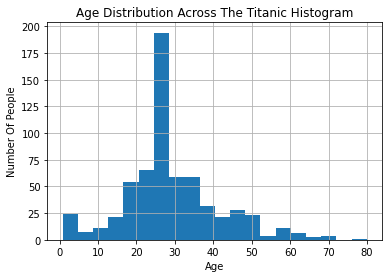

In [34]:
plt.xlabel("Age")
plt.ylabel("Number Of People")
plt.title("Age Distribution Across The Titanic Histogram")
dftrain.age.hist(bins=20) #Histogram

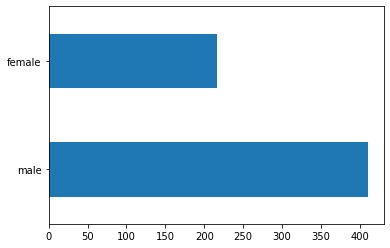

In [35]:
dftrain.sex.value_counts().plot(kind='barh') #Horizontal Bar Plot

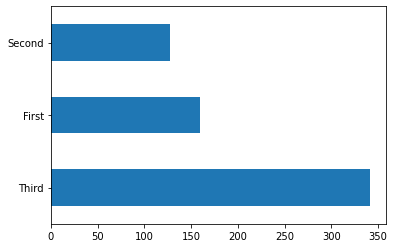

In [36]:
dftrain['class'].value_counts().plot(kind = 'barh')

Text(0.5, 0, '% Survival')

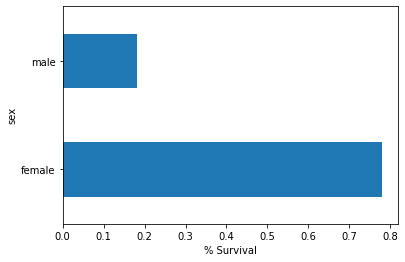

In [46]:
pd.concat([dftrain,y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% Survival')

**After analyzing this information, the following information is inferred:**
- Most passengers are in their **20's** or **30's**.
- Most passengers are **Male**.
- Most passengers are in **"Third"** class.
- **Females** have a much higher chance of survival.